<a href="https://colab.research.google.com/github/tsega200/fuel_prices/blob/main/Fuel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
#load the datasets
invoices = pd.read_csv('Invoices.csv')
tanks = pd.read_csv('Tanks.csv')
locations = pd.read_csv('Locations.csv')
fuel_1 = pd.read_csv('Fuel_Level_Part_1.csv')
fuel_2 = pd.read_csv('Fuel_Level_Part_2.csv')

**Data Cleaning**

In [ ]:
invoices.columns

Index(['Invoice Date', 'Invoice ID', 'Invoice Gas Station Location',
       'Gross Purchase Cost', 'Amount Purchased', 'Fuel Type'],
      dtype='object')

In [ ]:
# Renaming invoices column names
invoices= invoices.rename(columns={'Invoice Date': 'Invoice_date',
                                    'Invoice ID': 'Invoice_ID',
                                    'Invoice Gas Station Location': 'Station_location',
                                    'Gross Purchase Cost': 'Gross_purchase_cost',
                                    'Amount Purchased': 'Amount_purchased',
                                    'Fuel Type': 'Fuel_type'})
invoices.head()

,Invoice_date,Invoice_ID,Station_location,Gross_purchase_cost,Amount_purchased,Fuel_type
0,1/2/2017,10000.0,1,7570.820,6609.600,G
1,1/2/2017,10001.0,1,12491.853,9338.736,D
2,1/2/2017,10002.0,1,NaN,NaN,NaN
3,1/2/2017,10002.0,2,17034.345,13377.824,D
4,1/2/2017,NaN,2,NaN,NaN,NaN


In [ ]:
tanks.columns

Index(['Tank ID', 'Tank Location', 'Tank Number', 'Tank Type',
       'Tank Capacity'],
      dtype='object')

In [ ]:
#renaming tanks column names 
tanks= tanks.rename(columns={'Tank ID': 'Tank_ID',
                               'Tank Location': 'Station_location',
                               'Tank Number':'Tank_number',
                               'Tank Type': 'Tank_type',
                               'Tank Capacity': 'Tank_capacity'})
tanks.head()

,Tank_ID,Station_location,Tank_number,Tank_type,Tank_capacity
0,T 10,1,1,U,40000
1,T 11,1,2,U,40000
2,T 12,1,3,D,40000
3,T 13,1,4,P,40000
4,T 14,1,5,U,40000


In [ ]:
#replace U with G
tanks['Tank_type'] = tanks['Tank_type'].replace({'U': 'G'})

tanks.head()

,Tank_ID,Station_location,Tank_number,Tank_type,Tank_capacity
0,T 10,1,1,G,40000
1,T 11,1,2,G,40000
2,T 12,1,3,D,40000
3,T 13,1,4,P,40000
4,T 14,1,5,G,40000


In [ ]:
locations.columns

Index(['Gas Station Location', 'Gas Station Name', 'Gas Station Address',
       'Gas Station Latitude', 'Gas Station Longitude'],
      dtype='object')

In [ ]:
#renaming locations column names
locations= locations.rename(columns={'Gas Station Location': 'Station_location',
                                    'Gas Station Name': 'Station_name',
                                    'Gas Station Address': 'Station_address',
                                    'Gas Station Latitude': 'Station_latitude',
                                    'Gas Station Longitude': 'Station_longitude'})
locations.head()

,Station_location,Station_name,Station_address,Station_latitude,Station_longitude
0,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
1,2,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",43.230700,-79.763930
2,3,Central,"80 Park St N, Hamilton, ON L8R 2M9, Canada",43.260260,-79.870580
3,4,Chedoke,"16 McMaster Ave, Dundas, ON L9H 0A8, Canada",43.261849,-79.937057
4,5,Mountain View,"985 Scenic Dr, Hamilton, ON L9C 1H7, Canada",43.244910,-79.921850


In [ ]:
fuel_1.columns

Index(['Tank ID', 'Fuel Level', 'Time stamp'], dtype='object')

In [ ]:
#renaming fuel_1 column names 
fuel_1= fuel_1.rename(columns={'Tank ID': 'Tank_ID',
                                'Fuel Level': 'Fuel_level',
                                'Time stamp': 'Time_stamp'})
fuel_1.head()

,Tank_ID,Fuel_level,Time_stamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55


In [ ]:
fuel_2.columns

Index(['Tank ID', 'Fuel_Level', 'Timestamp'], dtype='object')

In [ ]:
#Renaming fuel_2 column names
fuel_2= fuel_2.rename(columns={'Tank ID': 'Tank_ID',
                               'Fuel_Level' : 'Fuel_level',
                               'Timestamp': 'Time_stamp'})
fuel_2.head()

,Tank_ID,Fuel_level,Time_stamp
0,T 32,22327,1/1/2017 0:05
1,T 20,25215,1/1/2017 0:07
2,T 10,25700,1/1/2017 0:09
3,T 11,25685,1/1/2017 0:10
4,T 14,27138,1/1/2017 0:10


In [ ]:
# Check for duplicates and drop them
invoices.drop_duplicates(inplace=True)
tanks.drop_duplicates(inplace=True)
locations.drop_duplicates(inplace=True)
fuel_1.drop_duplicates(inplace=True)
fuel_2.drop_duplicates(inplace=True)

In [ ]:
# Drop NaN values in fuel_1 and fuel_2 dataframes
fuel_1.dropna(inplace=True)
fuel_2.dropna(inplace=True)

In [ ]:
# Drop NaN values
invoices.dropna(inplace=True)
tanks.dropna(inplace=True)
locations.dropna(inplace=True)

In [ ]:
# Explore the data
invoices.info()
tanks.info()
locations.info()
fuel_1.info()
fuel_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 0 to 2872
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Invoice_date         2831 non-null   object 
 1   Invoice_ID           2831 non-null   float64
 2   Station_location     2831 non-null   int64  
 3   Gross_purchase_cost  2831 non-null   float64
 4   Amount_purchased     2831 non-null   float64
 5   Fuel_type            2831 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 154.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tank_ID           23 non-null     object
 1   Station_location  23 non-null     int64 
 2   Tank_number       23 non-null     int64 
 3   Tank_type         23 non-null     object
 4   Tank_capacity     23 non-null     int64 
dtypes

**Merging dataframes**

In [ ]:
# Merge the two fuel level files
fuel_level = pd.concat([fuel_1, fuel_2])
fuel_level.head()

,Tank_ID,Fuel_level,Time_stamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
4,T 12,26786.0,1/1/2017 0:55
5,T 12,26748.0,1/1/2017 1:10


In [ ]:
# Merge invoices and tanks dataframes to create inventory
inventory = pd.merge(fuel_level, tanks, on='Tank_ID')
invoices['Invoice_date'] = pd.to_datetime(invoices['Invoice_date'])
inventory.head()

,Tank_ID,Fuel_level,Time_stamp,Station_location,Tank_number,Tank_type,Tank_capacity
0,T 12,27161.0,1/1/2017 0:10,1,3,D,40000
1,T 12,27017.0,1/1/2017 0:25,1,3,D,40000
2,T 12,26934.0,1/1/2017 0:40,1,3,D,40000
3,T 12,26786.0,1/1/2017 0:55,1,3,D,40000
4,T 12,26748.0,1/1/2017 1:10,1,3,D,40000


**Data Exploration**

In [ ]:
# Calculating the total volume of fuel purchased for each fuel type at each gas station
fuel_purchased = invoices.groupby(['Station_location', 'Fuel_type'])['Amount_purchased'].sum().reset_index()
fuel_purchased.head()

,Station_location,Fuel_type,Amount_purchased
0,1,D,4.872458e+06
1,1,G,1.086621e+07
2,2,D,3.460900e+06
3,2,G,2.822514e+06
4,3,D,4.318151e+05


<AxesSubplot:xlabel='Amount_purchased'>

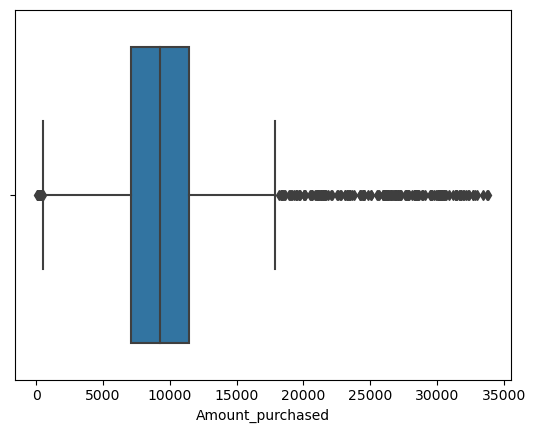

In [ ]:
# Check for outliers
sns.boxplot(x=invoices["Amount_purchased"])

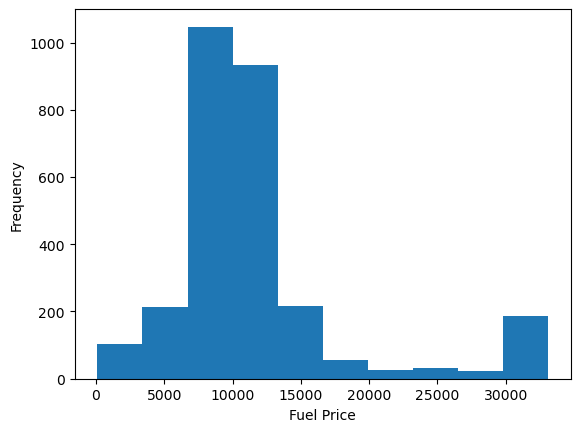

In [ ]:
plt.hist(invoices['Gross_purchase_cost'])
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')
plt.show()

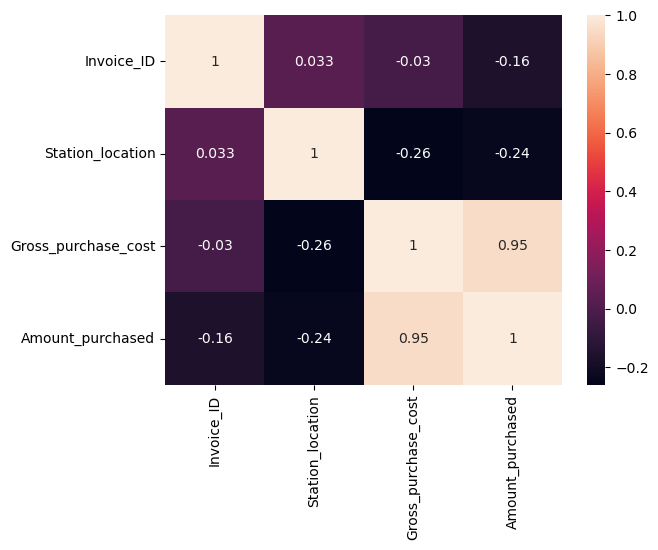

In [ ]:
sns.heatmap(invoices.corr(), annot=True)
plt.show()

In [ ]:
# Calculate the frequency of replenishment and total fuel purchase for each tank location 
replenishment = invoices.groupby(['Station_location', 'Fuel_type']).agg(
    {'Invoice_date': ['min', 'max', 'count'],
     'Amount_purchased': 'sum',
     'Gross_purchase_cost': 'sum'})
replenishment.columns = ['Earliest_Transaction_Date', 'Latest_Transaction_Date', 'Replenishment_Frequency', 
                           'Total_Fuel_Purchased', 'Total_Cost']

replenishment[['Earliest_Transaction_Date', 'Latest_Transaction_Date']] = replenishment[['Earliest_Transaction_Date', 'Latest_Transaction_Date']].apply(pd.to_datetime)
replenishment['Transaction_Date_diff'] = replenishment.apply(lambda row: (row['Latest_Transaction_Date']- row['Earliest_Transaction_Date']).days, axis=1).astype(int)
replenishment['Fuel_Purchased_perday']=replenishment['Total_Fuel_Purchased']/replenishment['Transaction_Date_diff']

replenishment.reset_index(inplace=True)
replenishment.head()

,Station_location,Fuel_type,Earliest_Transaction_Date,Latest_Transaction_Date,Replenishment_Frequency,Total_Fuel_Purchased,Total_Cost,Transaction_Date_diff,Fuel_Purchased_perday
0,1,D,2017-01-02,2019-08-15,599,4.872458e+06,5.896560e+06,955,5102.050295
1,1,G,2017-01-02,2019-08-14,762,1.086621e+07,1.230239e+07,954,11390.158507
2,2,D,2017-01-02,2019-08-14,347,3.460900e+06,4.015548e+06,954,3627.777577
3,2,G,2017-01-03,2019-08-08,285,2.822514e+06,3.040002e+06,947,2980.479172
4,3,D,2017-01-17,2019-03-12,41,4.318151e+05,4.929777e+05,784,550.784592


In [ ]:
# sort the data by tank ID and timestamp
fuel_level = fuel_level.sort_values(['Tank_ID', 'Time_stamp'])
fuel_level.head()

,Tank_ID,Fuel_level,Time_stamp
2,T 10,25700.0,1/1/2017 0:09
13,T 10,25666.0,1/1/2017 0:24
23,T 10,25624.0,1/1/2017 0:39
34,T 10,25560.0,1/1/2017 0:54
431,T 10,24080.0,1/1/2017 10:09


In [ ]:
# Create a data frame from a csv with monthly inflation rates of Canada from 2017-2019 found from Statistics Canada
infl_rate = pd.read_csv('canada_infl.csv', skiprows= [0])
infl_rate= infl_rate.rename(columns={'Canada': 'Month_year',
                                     'Percent': 'Inflation_rate'})

infl_rate['Month_year'] = pd.to_datetime(infl_rate['Month_year'], format='%y-%b')
infl_rate['Month_year'] = infl_rate['Month_year'].dt.strftime('%Y-%m')
infl_rate.head()

,Month_year,Inflation_rate
0,2017-01,1.1
1,2017-02,1.2
2,2017-03,1.1
3,2017-04,1.0
4,2017-05,0.9


In [ ]:
# Create a new column Month_year containg the month of and year of the invoices
invoices['Month_year'] = invoices['Invoice_date'].dt.strftime('%Y-%m')
invoices.dropna()

,Invoice_date,Invoice_ID,Station_location,Gross_purchase_cost,Amount_purchased,Fuel_type,Month_year
0,2017-01-02,10000.0,1,7570.82000,6609.600,G,2017-01
1,2017-01-02,10001.0,1,12491.85300,9338.736,D,2017-01
3,2017-01-02,10002.0,2,17034.34500,13377.824,D,2017-01
5,2017-01-02,10003.0,2,12616.77153,9432.112,D,2017-01
6,2017-01-02,10004.0,4,11363.80082,9139.200,D,2017-01
...,...,...,...,...,...,...,...
2868,2019-08-14,12826.0,2,14418.62669,8182.960,D,2019-08
2869,2019-08-14,12827.0,2,7570.82000,4296.640,D,2019-08
2870,2019-08-14,12828.0,4,8706.44300,6352.416,G,2019-08
2871,2019-08-14,12829.0,4,13252.72041,7521.264,D,2019-08


In [ ]:
# Merge the inflation dataframe with invoices to adjust the Gross Purchase Cost column for each invoice based on the inflation rate of the month it was purchased
invoices_infl = pd.merge(invoices, infl_rate, on='Month_year')
invoices_infl['Adjusted_fule_price'] = invoices_infl['Gross_purchase_cost'] /invoices_infl['Amount_purchased']/ (1 + invoices_infl['Inflation_rate'])
invoices_infl.head()

,Invoice_date,Invoice_ID,Station_location,Gross_purchase_cost,Amount_purchased,Fuel_type,Month_year,Inflation_rate,Adjusted_fule_price
0,2017-01-02,10000.0,1,7570.82000,6609.600,G,2017-01,1.1,0.545442
1,2017-01-02,10001.0,1,12491.85300,9338.736,D,2017-01,1.1,0.636971
2,2017-01-02,10002.0,2,17034.34500,13377.824,D,2017-01,1.1,0.606346
3,2017-01-02,10003.0,2,12616.77153,9432.112,D,2017-01,1.1,0.636971
4,2017-01-02,10004.0,4,11363.80082,9139.200,D,2017-01,1.1,0.592101


In [ ]:
invoices_infl.dropna()

,Invoice_date,Invoice_ID,Station_location,Gross_purchase_cost,Amount_purchased,Fuel_type,Month_year,Inflation_rate,Adjusted_fule_price
0,2017-01-02,10000.0,1,7570.82000,6609.600,G,2017-01,1.1,0.545442
1,2017-01-02,10001.0,1,12491.85300,9338.736,D,2017-01,1.1,0.636971
2,2017-01-02,10002.0,2,17034.34500,13377.824,D,2017-01,1.1,0.606346
3,2017-01-02,10003.0,2,12616.77153,9432.112,D,2017-01,1.1,0.636971
4,2017-01-02,10004.0,4,11363.80082,9139.200,D,2017-01,1.1,0.592101
...,...,...,...,...,...,...,...,...,...
2826,2019-08-14,12826.0,2,14418.62669,8182.960,D,2019-08,2.1,0.568397
2827,2019-08-14,12827.0,2,7570.82000,4296.640,D,2019-08,2.1,0.568398
2828,2019-08-14,12828.0,4,8706.44300,6352.416,G,2019-08,2.1,0.442120
2829,2019-08-14,12829.0,4,13252.72041,7521.264,D,2019-08,2.1,0.568398


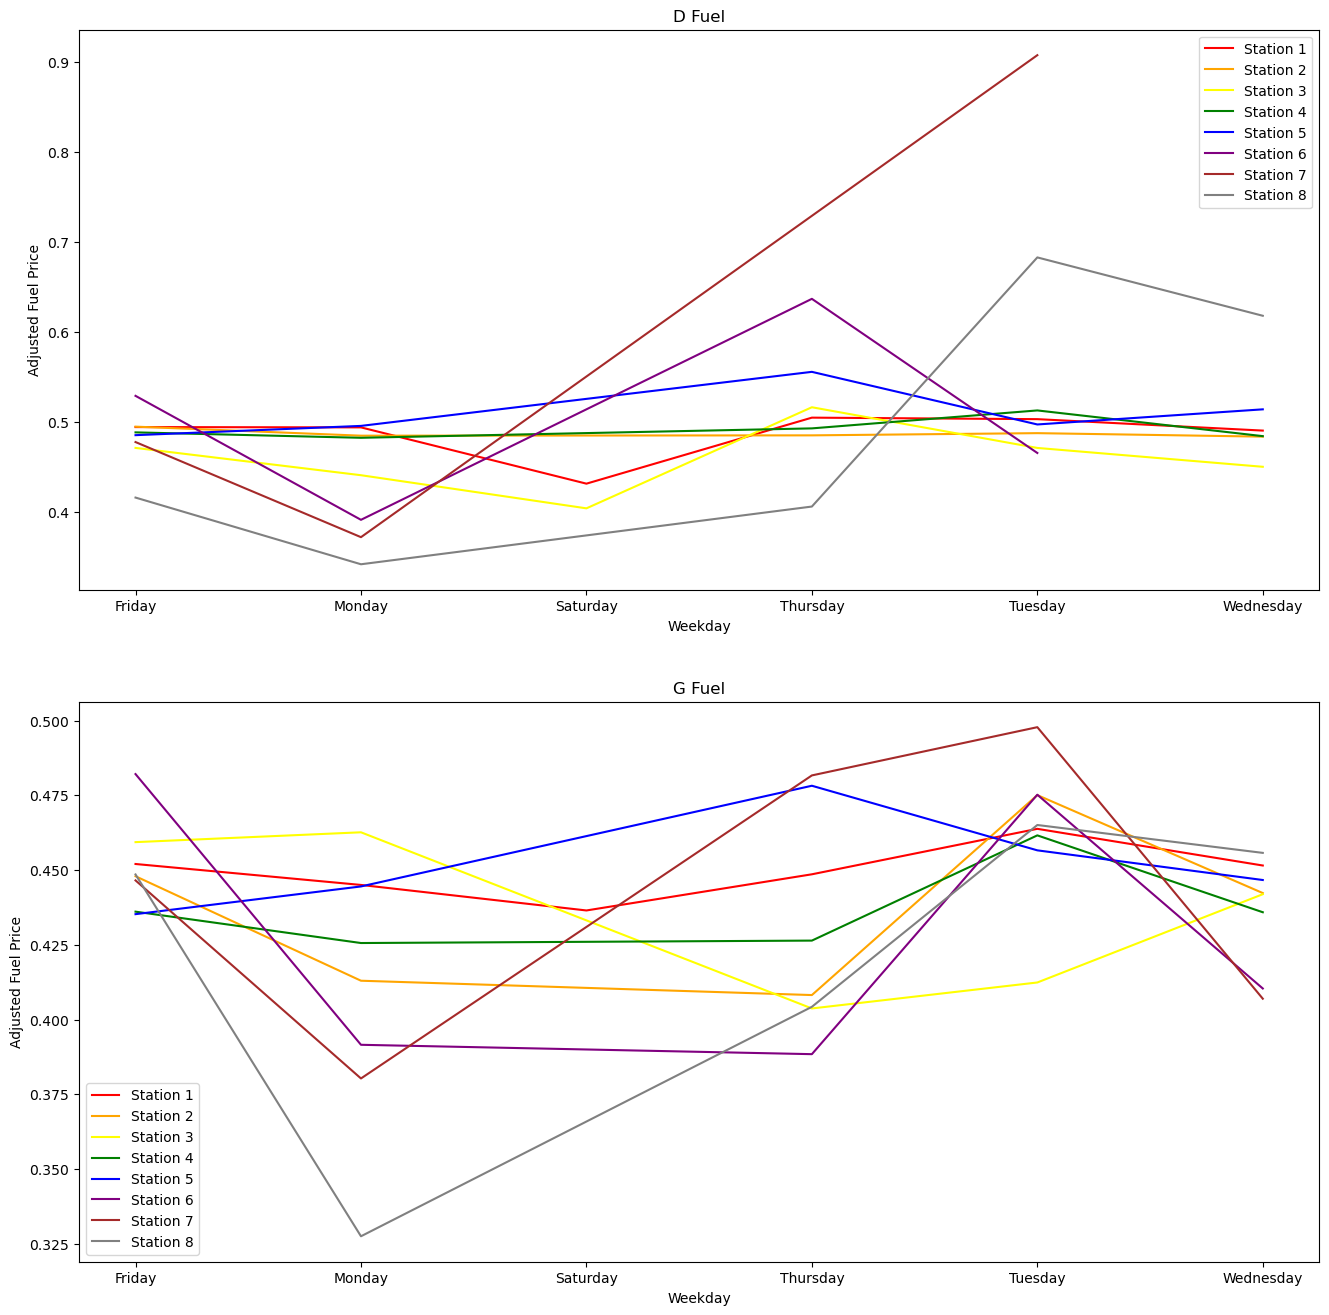

In [ ]:
#Overview of fule price in a week for each type in each location
# Define the station locations and fuel types
station_locations = range(1, 9)
fuel_types = ['D', 'G']
station_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'gray']

# Create a subplot for each fuel type
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))

for i, fuel_type in enumerate(fuel_types):
    ax = axes[i]
    ax.set_title(fuel_type + ' Fuel')

    for j, station_location in enumerate(station_locations):
        # Filter the data for the current station location and fuel type
        data = invoices_infl[(invoices_infl.Station_location == station_location) & (invoices_infl.Fuel_type == fuel_type)]
        data_copy = data.copy()
        data_copy['Weekday'] = data_copy['Invoice_date'].dt.weekday.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

        # Compute the mean adjusted fuel price for each weekday
        mean_price = data_copy.groupby('Weekday')['Adjusted_fule_price'].mean()

        # Plot the folding line chart for the current station location and fuel type
        sns.lineplot(x=mean_price.index, y=mean_price.values, color=station_colors[j], label='Station ' + str(station_location), ax=ax)

    # Set the axis labels
    ax.set_xlabel('Weekday')
    ax.set_ylabel('Adjusted Fuel Price')

    # Add a legend to the plot
    ax.legend()

# Show the plot
plt.show()

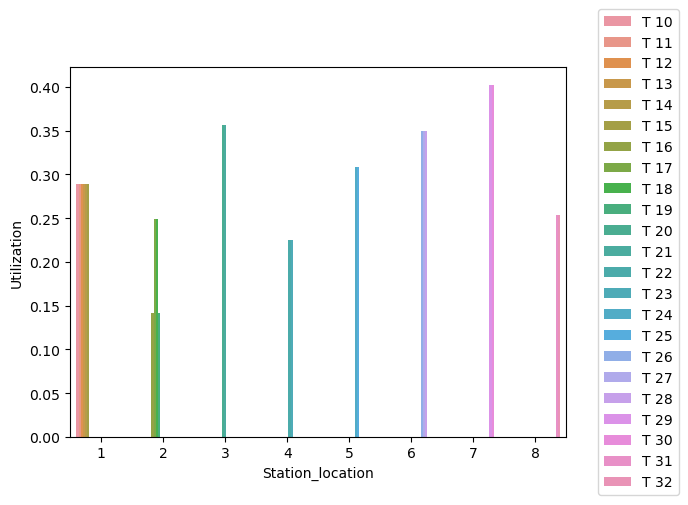

In [ ]:
# Tank capacity analysis
tank_capacities = inventory.groupby(['Station_location', 'Tank_ID']).agg({'Tank_capacity': 'max'}).reset_index()
average_fuel_volume = invoices.groupby(['Station_location']).agg({'Amount_purchased': 'mean'}).reset_index()
merged_tank_data = pd.merge(tank_capacities, average_fuel_volume, on=['Station_location'])
merged_tank_data['Utilization'] = merged_tank_data['Amount_purchased'] / merged_tank_data['Tank_capacity']
sns.barplot(x='Station_location', y='Utilization', hue='Tank_ID', data=merged_tank_data)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

<AxesSubplot:xlabel='Weekday', ylabel='Amount_purchased'>

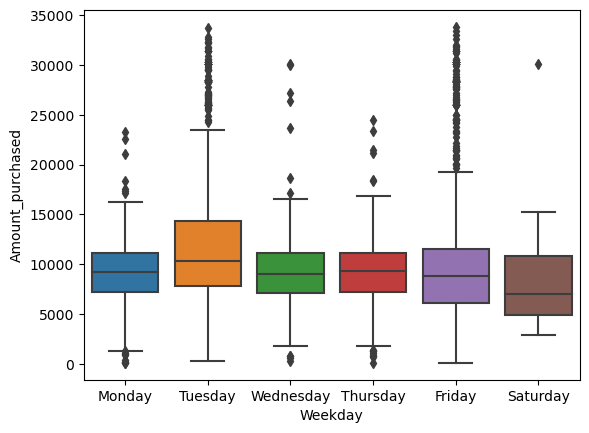

In [ ]:
#Best day to order fuel
invoices['Weekday'] = invoices['Invoice_date'].dt.weekday.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
sns.boxplot(x='Weekday', y='Amount_purchased', data=invoices)

**Business Question 1: How to order to minimize the cost and maximize the discount?**

In [ ]:
def optimal_replenishment(quantity):
    if quantity < 15000:
        discount = 0
    elif 15000 <= quantity < 25000:
        discount = 0.02
    elif 25000 <= quantity < 40000:
        discount = 0.03
    else:
        discount = 0.04
    return discount


In [ ]:
def days_to_highest_discount(quantity):
    if quantity < 25000:
        days = (25000 - quantity) / quantity
    elif quantity < 40000:
        days = (40000 - quantity) / quantity
    else:
        days = 0
    return days


In [ ]:
# Group the data by gas station, fuel type, and date, then sum the purchase quantities
replenishment_data = invoices.groupby(['Station_location', 'Fuel_type', 'Invoice_date']).agg(
    {'Amount_purchased': 'sum',
     'Gross_purchase_cost': 'sum'})

replenishment_data.reset_index(inplace=True)
replenishment_data['Invoice_date'] = pd.to_datetime(replenishment_data['Invoice_date'])

# Calculate the average number of days between replenishments for each gas station and fuel type
replenishment_data['days_diff'] = replenishment_data.groupby(['Station_location', 'Fuel_type'])['Invoice_date'].diff().dt.days
replenishment_frequency = replenishment_data.groupby(['Station_location', 'Fuel_type'])['days_diff'].mean().reset_index()

# Calculate the average replenishment quantity for each gas station and fuel type
replenishment_quantity = replenishment_data.groupby(['Station_location', 'Fuel_type'])['Amount_purchased'].mean().reset_index()

# Merge replenishment frequency and quantity data
replenishment_summary = pd.merge(replenishment_frequency, replenishment_quantity, on=['Station_location', 'Fuel_type'])

# Apply the optimal_replenishment function to the average replenishment quantity
replenishment_summary['discount'] = replenishment_summary['Amount_purchased'].apply(optimal_replenishment)

# Calculate the total cost for each gas station and fuel type based on the optimal replenishment quantity
replenishment_summary['total_cost'] = replenishment_summary['Amount_purchased'] * (1 - replenishment_summary['discount'])

replenishment_summary['Days_to_highest_discount'] = replenishment_summary['Amount_purchased'].apply(days_to_highest_discount)

replenishment_summary['Optimal_Frequency'] = replenishment_summary['days_diff'] / (1 + replenishment_summary['Days_to_highest_discount'])
replenishment_summary['Potential_Improvement'] = (replenishment_summary['days_diff'] - replenishment_summary['Optimal_Frequency']) / replenishment_summary['days_diff']

replenishment_summary.head()


,Station_location,Fuel_type,days_diff,Amount_purchased,discount,total_cost,Days_to_highest_discount,Optimal_Frequency,Potential_Improvement
0,1,D,2.126949,10827.684516,0.00,10827.684516,1.308896,0.921197,0.566893
1,1,G,1.783178,20272.782119,0.02,19867.326477,0.233181,1.445999,0.189089
2,2,D,4.240000,15313.715965,0.02,15007.441645,0.632523,2.597206,0.387451
3,2,G,5.809816,17210.449854,0.02,16866.240857,0.452606,3.999582,0.311582
4,3,D,19.600000,10532.076098,0.00,10532.076098,1.373701,8.257148,0.578717


In [ ]:
# Print out the optimal replenishment frequency and potential improvement for each gas station and fuel type
print("Optimal replenishment frequency and potential improvement:")
for index, row in replenishment_summary.iterrows():
    station = row['Station_location']
    fuel_type = row['Fuel_type']
    frequency = round(row['Optimal_Frequency'], 2)
    improvement = round(row['Potential_Improvement'] * 100, 2)

    print(f"For station {station} and fuel type {fuel_type}, "
          f"the optimal replenishment frequency is {frequency} days "
          f"with a potential improvement of {improvement}%.")

Optimal replenishment frequency and potential improvement:
For station 1 and fuel type D, the optimal replenishment frequency is 0.92 days with a potential improvement of 56.69%.
For station 1 and fuel type G, the optimal replenishment frequency is 1.45 days with a potential improvement of 18.91%.
For station 2 and fuel type D, the optimal replenishment frequency is 2.6 days with a potential improvement of 38.75%.
For station 2 and fuel type G, the optimal replenishment frequency is 4.0 days with a potential improvement of 31.16%.
For station 3 and fuel type D, the optimal replenishment frequency is 8.26 days with a potential improvement of 57.87%.
For station 3 and fuel type G, the optimal replenishment frequency is 10.16 days with a potential improvement of 56.56%.
For station 4 and fuel type D, the optimal replenishment frequency is 1.87 days with a potential improvement of 64.32%.
For station 4 and fuel type G, the optimal replenishment frequency is 2.04 days with a potential impro

In [ ]:
# Best date value
invoices['Weekday'] = invoices['Invoice_date'].dt.day_name()
weekday_means = invoices.groupby('Weekday')['Amount_purchased'].mean().reset_index()
weekday_means = weekday_means.sort_values('Amount_purchased', ascending=False)
max_day_value = weekday_means.iloc[0]['Weekday']
print("The day with highest average amount of fuel purchased is:", max_day_value)

The day with highest average amount of fuel purchased is: Tuesday


**Business Question 2: What day to order?**

In [ ]:
# Best Date Price
station_locations = range(1,9)  # List of station locations to consider
fuel_types = ['D', 'G']  # List of fuel types to consider
min_prices_D = float('inf')  # Initialize the lowest price for type D fuel to infinity
min_prices_G = float('inf')  # Initialize the lowest price for type G fuel to infinity

for i, station_location in enumerate(station_locations):
    for j, fuel_type in enumerate(fuel_types):
        # Filter the data for the current station location and fuel type
        data = invoices_infl[(invoices_infl.Station_location == station_location) & (invoices_infl.Fuel_type == fuel_type)]
        data_copy = data.copy()
        data_copy['Weekday'] = data_copy['Invoice_date'].dt.weekday.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

        weekday_means = data_copy.groupby('Weekday')['Adjusted_fule_price'].mean().reset_index()
        weekday_means = weekday_means.sort_values('Adjusted_fule_price', ascending=True)
        best_day_value = weekday_means.iloc[0]['Weekday']
        best_day_price = weekday_means.iloc[0]['Adjusted_fule_price']
        print(f"The best date price of Type {fuel_type} fuel in the station {station_location} is {best_day_value} with a price of {best_day_price:.2f}")
        
        min_price = weekday_means.iloc[0]['Adjusted_fule_price'].min()        
        # Update the lowest price for the current fuel type
        if fuel_type == 'D' and min_price < min_prices_D:
            min_prices_D = min_price
            min_price_D_date = best_day_value
            min_price_D_station = station_location
        elif fuel_type == 'G' and min_price < min_prices_G:
            min_prices_G = min_price
            min_price_G_date = best_day_value
            min_price_G_station = station_location

print(f"The lowest price for type D fuel is {min_prices_D:.2f} in station {min_price_D_station} on {min_price_D_date}")
print(f"The lowest price for type G fuel is {min_prices_G:.2f} in station {min_price_G_station} on {min_price_G_date}")

The best date price of Type D fuel in the station 1 is Saturday with a price of 0.43
The best date price of Type G fuel in the station 1 is Saturday with a price of 0.44
The best date price of Type D fuel in the station 2 is Wednesday with a price of 0.48
The best date price of Type G fuel in the station 2 is Thursday with a price of 0.41
The best date price of Type D fuel in the station 3 is Saturday with a price of 0.40
The best date price of Type G fuel in the station 3 is Thursday with a price of 0.40
The best date price of Type D fuel in the station 4 is Monday with a price of 0.48
The best date price of Type G fuel in the station 4 is Monday with a price of 0.43
The best date price of Type D fuel in the station 5 is Friday with a price of 0.49
The best date price of Type G fuel in the station 5 is Friday with a price of 0.44
The best date price of Type D fuel in the station 6 is Monday with a price of 0.39
The best date price of Type G fuel in the station 6 is Thursday with a pri

**Business Question 3: What is the optimal tank size? Should we increase the capacity of tank size?**

In [ ]:
# Develop recommendations on tanks size
def calculate_new_tank_size(utilization, current_tank_size, days_diff):
    gallons_per_day = current_tank_size * utilization / days_diff

    # Determine the optimal tank size based on the number of days between deliveries
    return gallons_per_day * days_diff

In [ ]:
def generate_recommendations(recommendations_df):
    recommendations = []
    for index, row in recommendations_df.iterrows():
        recommendation = f"For station {row['Station_location']} and fuel type {row['Fuel_type']}, "
        recommendation += f"switching to a {round(row['New_tank_size'],4)} gallon tank can save up to ${round(row['Savings_Potential'], 2)} in gross purchase costs per year. "
        recommendation += f"This would result in a {round(row['Savings_Percentage']*100, 2)}% savings."
        recommendations.append(recommendation)
    return recommendations

In [ ]:
recommendations_df = performance_df.merge(tank_capacities.groupby(['Station_location'])['Tank_capacity'].mean().reset_index(), on='Station_location')
recommendations_df['New_tank_size'] = merged_tank_data.apply(
    lambda row: calculate_new_tank_size(row['Utilization'], row['Tank_capacity'],7), axis=1)
# Sort recommendations by potential cost savings
recommendations_df = recommendations_df.sort_values('Savings_Potential', ascending=False)

In [ ]:
recommendations = generate_recommendations(recommendations_df)
print("Recommended tank sizes:")
for recommendation in recommendations:
    print(recommendation)

Recommended tank sizes:
For station 1 and fuel type G, switching to a 11564.0479 gallon tank can save up to $1624421.7 in gross purchase costs per year. This would result in a 15.0% savings.
For station 1 and fuel type D, switching to a 11564.0479 gallon tank can save up to $1026449.34 in gross purchase costs per year. This would result in a 21.0% savings.
For station 2 and fuel type D, switching to a 11564.0479 gallon tank can save up to $561409.42 in gross purchase costs per year. This would result in a 16.0% savings.
For station 4 and fuel type D, switching to a 9942.1101 gallon tank can save up to $335436.39 in gross purchase costs per year. This would result in a 21.0% savings.
For station 2 and fuel type G, switching to a 11564.0479 gallon tank can save up to $221023.31 in gross purchase costs per year. This would result in a 8.0% savings.
For station 5 and fuel type D, switching to a 9942.1101 gallon tank can save up to $182946.86 in gross purchase costs per year. This would res

**Business Question 4: Identify which fuel stations would benefit most.**

In [ ]:
# Group inventory by station and date
invoices_grouped = invoices.groupby(['Station_location', 'Invoice_date'])

# Calculate total fuel purchased and total cost for each group
total_fuel_purchased = invoices_grouped['Amount_purchased'].sum()
total_cost = invoices_grouped['Gross_purchase_cost'].sum().round(2)

# Calculate average fuel price for each group
avg_price = (total_cost / total_fuel_purchased).round(2)


# Calculate inventory change for each group
inventory_change = invoices_grouped['Amount_purchased'].sum().diff().fillna(0)

# Combine all results into a single DataFrame
inventory_analysis = pd.DataFrame({'Total_fuel_purchased': total_fuel_purchased,
                                   'Total_cost': total_cost,
                                   'Average_price': avg_price,
                                   'Inventory_change': inventory_change})

# Print the first five rows of the analysis
inventory_analysis.head()

Total_fuel_purchased  Total_cost  \
Station_location Invoice_date                                     
1                2017-01-02               15948.336    20062.67   
                 2017-01-03               37603.360    45474.13   
                 2017-01-04                5659.840     7570.82   
                 2017-01-05               15336.800    18927.05   
                 2017-01-06               48049.776    58321.81   

                               Average_price  Inventory_change  
Station_location Invoice_date                                   
1                2017-01-02             1.26             0.000  
                 2017-01-03             1.21         21655.024  
                 2017-01-04             1.34        -31943.520  
                 2017-01-05             1.23          9676.960  
                 2017-01-06             1.21         32712.976

In [ ]:
# Calculate average daily fuel consumption for each gas station and fuel type
daily_consumption = invoices.groupby(['Station_location', 'Fuel_type', 'Invoice_date'])['Amount_purchased'].sum().reset_index()
daily_consumption['Day_of_Week'] = daily_consumption['Invoice_date'].dt.day_name()

# Calculate average daily consumption for each gas station and fuel type
daily_consumption['Avg_Daily_Consumption'] = daily_consumption.groupby(['Station_location', 'Fuel_type', 'Invoice_date'])['Amount_purchased'].transform('mean')

# Calculate the daily change in consumption for each gas station and fuel type
daily_consumption['Daily_Change'] = daily_consumption.groupby(['Station_location', 'Fuel_type'])['Avg_Daily_Consumption'].diff()

daily_consumption.head()


,Station_location,Fuel_type,Invoice_date,Amount_purchased,Day_of_Week,Avg_Daily_Consumption,Daily_Change
0,1,D,2017-01-02,9338.736,Monday,9338.736,NaN
1,1,D,2017-01-03,4239.216,Tuesday,4239.216,-5099.520
2,1,D,2017-01-04,5659.840,Wednesday,5659.840,1420.624
3,1,D,2017-01-05,7074.800,Thursday,7074.800,1414.960
4,1,D,2017-01-06,7074.800,Friday,7074.800,0.000


In [ ]:
# Calculate the potential savings using the optimal discount
invoices['Potential_Cost'] = invoices['Amount_purchased'] * (1 - invoices['Amount_purchased'].apply(optimal_replenishment))
invoices['Potential_Cost'] = invoices['Potential_Cost'].round(2)

# Group the data by gas station and fuel type
potential_savings = invoices.groupby(['Station_location', 'Fuel_type'])['Potential_Cost'].sum().reset_index()
actual_cost = invoices.groupby(['Station_location', 'Fuel_type'])['Gross_purchase_cost'].sum().reset_index()

# Merge the potential savings and actual cost
performance_df = potential_savings.merge(actual_cost, on=['Station_location', 'Fuel_type'])

# Calculate the actual savings and savings percentage
performance_df['Actual_Savings'] = performance_df['Potential_Cost'] - performance_df['Gross_purchase_cost'].round(2)

performance_df['Savings_Potential'] = performance_df['Gross_purchase_cost'] - performance_df['Potential_Cost']
performance_df['Savings_Potential'] = performance_df['Savings_Potential'].round(2)

performance_df['Savings_Percentage'] = (performance_df['Savings_Potential'] / performance_df['Potential_Cost']).round(2)
performance_df.head()


,Station_location,Fuel_type,Potential_Cost,Gross_purchase_cost,Actual_Savings,Savings_Potential,Savings_Percentage
0,1,D,4870110.31,5.896560e+06,-1026449.34,1026449.34,0.21
1,1,G,10677971.53,1.230239e+07,-1624421.70,1624421.70,0.15
2,2,D,3454138.37,4.015548e+06,-561409.42,561409.42,0.16
3,2,G,2818978.89,3.040002e+06,-221023.31,221023.31,0.08
4,3,D,431495.68,4.929777e+05,-61482.05,61482.05,0.14


In [ ]:
print("Maximum Possible Savings:")
for index, row in performance_df.iterrows():
    station = row['Station_location']
    fuel_type = row['Fuel_type']
    savings_potential = row['Savings_Potential']
    savings_percentage = row['Savings_Percentage'] * 100  # Convert to percentage

    print(f"For station {station} and fuel type {fuel_type}, "
          f"the maximum possible savings that could be achieved if the gas station always purchased fuel at the highest discount rate is up to ${savings_potential:.2f} "
          f"in gross purchase costs per year. This would result in a {savings_percentage:.2f}% savings.")


Maximum Possible Savings:
For station 1 and fuel type D, the maximum possible savings that could be achieved if the gas station always purchased fuel at the highest discount rate is up to $1026449.34 in gross purchase costs per year. This would result in a 21.00% savings.
For station 1 and fuel type G, the maximum possible savings that could be achieved if the gas station always purchased fuel at the highest discount rate is up to $1624421.70 in gross purchase costs per year. This would result in a 15.00% savings.
For station 2 and fuel type D, the maximum possible savings that could be achieved if the gas station always purchased fuel at the highest discount rate is up to $561409.42 in gross purchase costs per year. This would result in a 16.00% savings.
For station 2 and fuel type G, the maximum possible savings that could be achieved if the gas station always purchased fuel at the highest discount rate is up to $221023.31 in gross purchase costs per year. This would result in a 8.00

In [ ]:
#Identify which fuel station and which tank benefit most
performance_df.sort_values(by='Savings_Percentage', axis=0, ascending=False, inplace=True)
performance_grouped=performance_df.groupby(['Station_location'])[['Savings_Potential','Potential_Cost']].sum().reset_index()
performance_grouped['Savings_Percentage']= (performance_grouped['Savings_Potential'] / performance_grouped['Potential_Cost'])  
performance_grouped.sort_values(by='Savings_Percentage', axis=0, ascending=False, inplace=True)
print(f'Fuel station {performance_df.Station_location[8]} type {performance_df.Fuel_type[8]} would benefit most, with {performance_df.Savings_Percentage[0]:.2f} percentage savings.')
print(f'Fuel station {performance_grouped.Station_location[0]} would benefit most, with {performance_grouped.Savings_Percentage[0]:.2f} percentage savings.')
print(performance_grouped.head())
performance_df.head()

Fuel station 5 type D would benefit most, with 0.21 percentage savings.
Fuel station 1 would benefit most, with 0.17 percentage savings.
   Station_location  Savings_Potential  Potential_Cost  Savings_Percentage
0                 1         2650871.04     15548081.84            0.170495
3                 4          487591.38      3210742.83            0.151862
4                 5          323922.90      2158446.77            0.150072
7                 8           37624.95       282457.96            0.133205
1                 2          782432.73      6273117.26            0.124728


,Station_location,Fuel_type,Potential_Cost,Gross_purchase_cost,Actual_Savings,Savings_Potential,Savings_Percentage
8,5,D,811733.97,9.946808e+05,-182946.86,182946.86,0.23
0,1,D,4870110.31,5.896560e+06,-1026449.34,1026449.34,0.21
6,4,D,1632125.09,1.967561e+06,-335436.39,335436.39,0.21
10,6,D,54629.95,6.601755e+04,-11387.60,11387.60,0.21
12,7,D,11082.26,1.319594e+04,-2113.68,2113.68,0.19
